<a href="https://colab.research.google.com/github/kevinluyo42/UTEC_DS-IA/blob/main/1_hill_climbing_n_queens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import time

#N Reinas

In [ ]:
def generar_estado_inicial(n):
    return [random.randint(0, n - 1) for _ in range(n)]

In [ ]:
def fitness(estado):
    conflictos = 0
    n = len(estado)
    for i in range(n):
        for j in range(i + 1, n):
            if estado[i] == estado[j] or abs(estado[i] - estado[j]) == abs(i - j):
                conflictos += 1
    return conflictos

In [ ]:
def get_neighbors(estado):
    vecinos = []
    n = len(estado)
    for col in range(n):
        for fila in range(n):
            if fila != estado[col]:
                nuevo_estado = list(estado)
                nuevo_estado[col] = fila
                vecinos.append(nuevo_estado)
    return vecinos

In [ ]:
def hill_climbing(n, max_iter=1000):
    estado_actual = generar_estado_inicial(n)
    conflictos_actuales = fitness(estado_actual)

    for _ in range(max_iter):
        mejor_vecino = estado_actual
        conflictos_mejor = conflictos_actuales

        while True:
            vecinos = get_neighbors(mejor_vecino)
            mejor_en_vecinos = min(vecinos, key=fitness)
            conflictos_nuevo = fitness(mejor_en_vecinos)

            if conflictos_nuevo < conflictos_mejor:
                mejor_vecino = mejor_en_vecinos
                conflictos_mejor = conflictos_nuevo
            else:
                break  # no mejora, detener

        if conflictos_mejor < conflictos_actuales:
            estado_actual = mejor_vecino
            conflictos_actuales = conflictos_mejor
        else:
            break

        if conflictos_actuales == 0:
            break

    return estado_actual, conflictos_actuales

In [ ]:
def simulated_annealing(n, max_iter=1000, temp=100.0, enfriamiento=0.95):
    estado_actual = generar_estado_inicial(n)
    conflictos_actuales = fitness(estado_actual)

    for _ in range(max_iter):
        if conflictos_actuales == 0:
            break

        col = random.randint(0, n - 1)
        fila_nueva = random.randint(0, n - 1)
        nuevo_estado = list(estado_actual)
        nuevo_estado[col] = fila_nueva

        conflictos_nuevos = fitness(nuevo_estado)
        delta = conflictos_nuevos - conflictos_actuales

        if delta < 0 or random.random() < np.exp(-delta / temp):
            estado_actual = nuevo_estado
            conflictos_actuales = conflictos_nuevos

        temp *= enfriamiento

    return estado_actual, conflictos_actuales

In [ ]:
# Generar datos
N = 8  # Número de reinas
iteraciones = 10000

resultados_hc = []
resultados_sa = []

mejor_estado_hc = None
mejor_conflicto_hc = float('inf')

start_time_hc = time.perf_counter()
for _ in range(iteraciones):
    estado, conflictos = hill_climbing(N)
    resultados_hc.append(conflictos)
    if conflictos < mejor_conflicto_hc:
        mejor_conflicto_hc = conflictos
        mejor_estado_hc = estado
total_time_hc = time.perf_counter() - start_time_hc

start_time_sa = time.perf_counter()
for _ in range(iteraciones):
    _, c_sa = simulated_annealing(N)
    resultados_sa.append(c_sa)
total_time_sa = time.perf_counter() - start_time_sa

# Calcular promedios
prom_hc = np.mean(resultados_hc)
prom_sa = np.mean(resultados_sa)

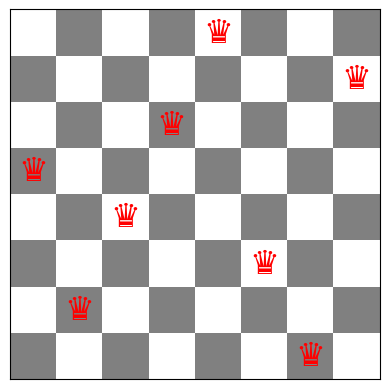

In [ ]:
def plot_reinas(estado):
    n = len(estado)
    tablero = np.zeros((n, n))

    fig, ax = plt.subplots()
    for i in range(n):
        for j in range(n):
            color = 'white' if (i + j) % 2 == 0 else 'gray'
            rect = plt.Rectangle([j, n - i - 1], 1, 1, facecolor=color)
            ax.add_patch(rect)

    for col, row in enumerate(estado):
        ax.text(col + 0.5, n - row - 1 + 0.5, '♛', fontsize=24,
                ha='center', va='center', color='red')

    ax.set_xlim(0, n)
    ax.set_ylim(0, n)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')
    #plt.title(f'Distribución óptima de {n} Reinas (Hill Climbing)')
    plt.show()

# Graficar mejor estado
plot_reinas(mejor_estado_hc)

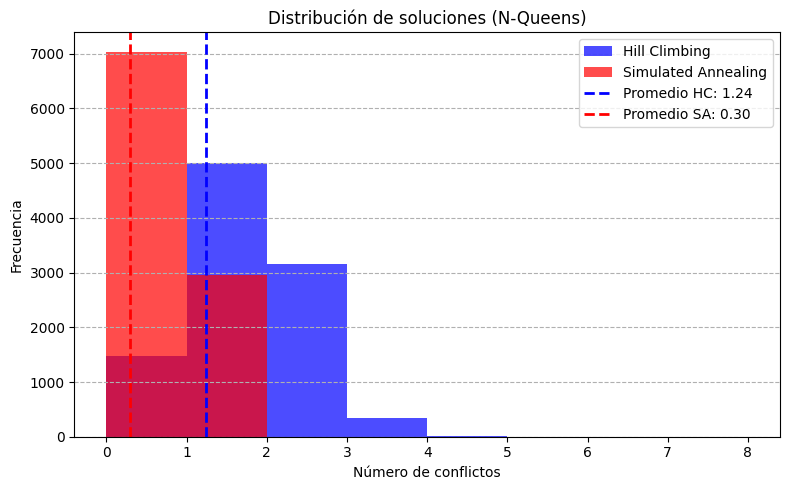

In [ ]:
# Graficar
plt.figure(figsize=(8, 5))
plt.hist(resultados_hc, bins=range(0, N+1), alpha=0.7, color='blue', label='Hill Climbing')
plt.hist(resultados_sa, bins=range(0, N+1), alpha=0.7, color='red', label='Simulated Annealing')

plt.axvline(prom_hc, color='blue', linestyle='--', linewidth=2, label=f'Promedio HC: {prom_hc:.2f}')
plt.axvline(prom_sa, color='red', linestyle='--', linewidth=2, label=f'Promedio SA: {prom_sa:.2f}')

plt.title("Distribución de soluciones (N-Queens)")
plt.xlabel("Número de conflictos")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(True, axis='y', linestyle='--')
plt.tight_layout()
plt.show()

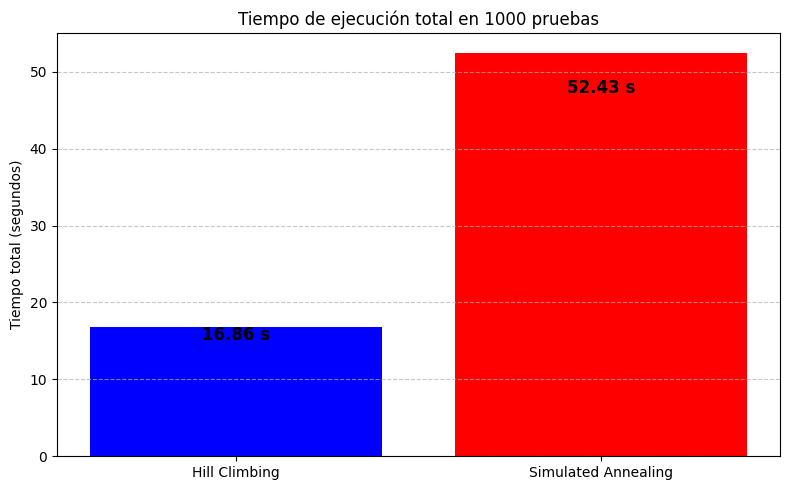

In [ ]:
plt.figure(figsize=(8, 5))
plt.bar(["Hill Climbing", "Simulated Annealing"], [total_time_hc, total_time_sa], color=["blue", "red"])
plt.ylabel("Tiempo total (segundos)")
plt.title("Tiempo de ejecución total en 1000 pruebas")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Agregar etiquetas debajo de cada barra con el tiempo exacto
for i, tiempo in enumerate([total_time_hc, total_time_sa]):
    plt.text(i, tiempo * 0.9, f"{tiempo:.2f} s", ha="center", fontsize=12, fontweight="bold", color="black")

plt.tight_layout()
plt.show()